In [1]:
ticker = "KORI.PA"

In [2]:
# Parameters
ticker = "MAR"


In [3]:
import yfinance as yf
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


stock = yf.Ticker(ticker)
dax = yf.Ticker("^GDAXI")
sp = yf.Ticker("^GSPC")

#### stock history values
history_5y = stock.history(period='5y')['Close']
history_1y = stock.history(period='1y')['Close']
history_since_corona = history_1y[history_1y.index >= '2020-02-20']

dax_5y = dax.history(period='5y')['Close']
dax_1y = dax.history(period='1y')['Close']
sp_5y = sp.history(period='5y')['Close']
sp_1y = sp.history(period='1y')['Close']


def get_stock_info(label):
    try:
        value = stock.info[label]
    except:
        value = None
    return value

#### df values: "name", "symbol", "sector", "industry", "country", "business_summary", "ret_since_corona", "ret_1y", "ret_5y", "ret_1y_wo_corona", "ret_5y_wo_corona", "perc_diff_dax_1y_wo_corona", "perc_diff_dax_5y_wo_corona", "perc_diff_sp_1y_wo_corona", "perc_diff_sp_5y_wo_corona"
name = get_stock_info("longName")
symbol = get_stock_info("symbol")
sector = get_stock_info("sector")
industry = get_stock_info("industry")
country = get_stock_info("country")
business_summary = get_stock_info("longBusinessSummary")

ret_since_corona = history_since_corona.pct_change().sum()
ret_1y = history_1y.pct_change().sum()
ret_5y = history_5y.pct_change().sum()
ret_1y_wo_corona = history_1y[history_1y.index <= '2020-02-21'].pct_change().sum()
ret_5y_wo_corona = history_5y[history_5y.index <= '2020-02-21'].pct_change().sum()

dax_1y_wo_corona = dax_1y[dax_1y.index <= '2020-02-21'].pct_change().sum()
dax_5y_wo_corona = dax_5y[dax_5y.index <= '2020-02-21'].pct_change().sum()
sp_1y_wo_corona = sp_1y[sp_1y.index <= '2020-02-21'].pct_change().sum()
sp_5y_wo_corona = sp_5y[sp_5y.index <= '2020-02-21'].pct_change().sum()

perc_diff_dax_1y_wo_corona = ret_1y_wo_corona - dax_1y_wo_corona
perc_diff_dax_5y_wo_corona = ret_5y_wo_corona - dax_5y_wo_corona
perc_diff_sp_1y_wo_corona = ret_1y_wo_corona - sp_1y_wo_corona
perc_diff_sp_5y_wo_corona = ret_5y_wo_corona - sp_5y_wo_corona

# # create new dataframe (only do once)
# df = pd.DataFrame(columns=["name", "symbol", "sector", "industry", "country", "business_summary", "ret_since_corona", "ret_1y", "ret_5y", "ret_1y_wo_corona", "ret_5y_wo_corona", "perc_diff_dax_1y_wo_corona", "perc_diff_dax_5y_wo_corona", "perc_diff_sp_1y_wo_corona", "perc_diff_sp_5y_wo_corona"])
# load existing pickle
df = pd.read_pickle("./stock_returns.pkl")
# check if stock in pickle already, if not, add stock
if sum(symbol == df.symbol) == 0:
    df.loc[len(df)] = [name, symbol, sector, industry, country, business_summary, ret_since_corona, ret_1y, ret_5y, ret_1y_wo_corona, ret_5y_wo_corona, perc_diff_dax_1y_wo_corona, perc_diff_dax_5y_wo_corona, perc_diff_sp_1y_wo_corona, perc_diff_sp_5y_wo_corona]
    df.to_pickle("./stock_returns.pkl")

In [4]:
print(f"""
Company name: {name}
Symbol: {symbol}
Sector: {sector}
Industry: {industry}
Country: {country}\n
Business summary: {business_summary}
""")


Company name: Marriott International, Inc.
Symbol: MAR
Sector: Consumer Cyclical
Industry: Lodging
Country: United States

Business summary: Marriott International, Inc. operates, franchises, and licenses hotel, residential, and timeshare properties worldwide. The company operates through North American Full-Service, North American Limited-Service, and Asia Pacific segments. It operates its properties under the JW Marriott, The Ritz-Carlton, Ritz-Carlton Reserve, W Hotels, The Luxury Collection, St. Regis, EDITION, Bulgari, Marriott Hotels, Sheraton, Delta Hotels, Marriott Executive Apartments, Marriott Vacation Club, Westin, Renaissance, Le Méridien, Autograph Collection, Gaylord Hotels, Tribute Portfolio, Design Hotels, Courtyard, Residence Inn, Fairfield by Marriott, SpringHill Suites, Four Points, TownePlace Suites, Aloft, AC Hotels by Marriott, Protea Hotels, Element, and Moxy brand names. As of February 3, 2020, it operated approximately 7,300 properties under 30 hotel brands in

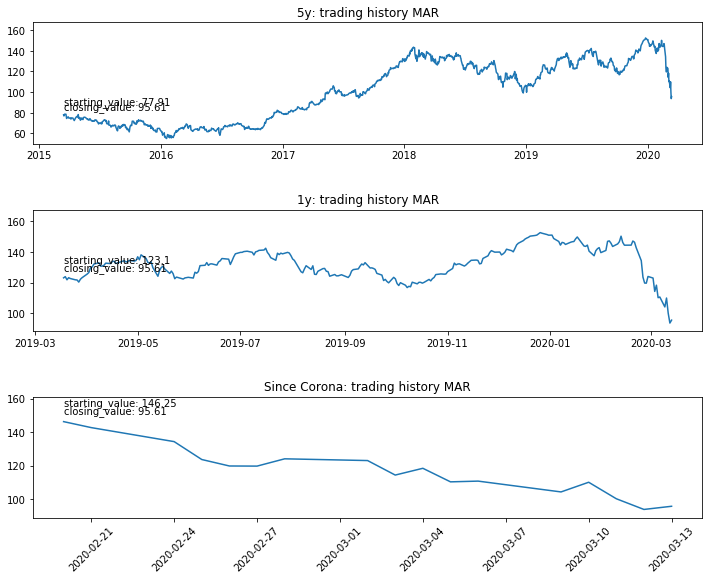

1y:              percent return: -20.75%
Since Corona:    percent return: -40.28%

5y percent return before 21.02.20: 74.16%. Diff to dax: 55.69%
1y percent return before 21.02.20: 17.08%. Diff to dax: 1.15%


In [5]:
# Create 2x2 sub plots
gs = gridspec.GridSpec(4, 1)

plt.figure(figsize = (10,10))

plt.subplot(gs[0, 0])
plt.plot(history_5y)
plt.title(f"5y: trading history {stock.info['symbol']}")
plt.text(history_5y.index[0], history_5y[0]+10, f"starting_value: {history_5y[0]}")
plt.text(history_5y.index[0], history_5y[0]+5, f"closing_value: {history_5y[-1]}")
plt.ylim(min(history_5y)-5, max(history_5y)+15)

plt.subplot(gs[1, 0])
plt.plot(history_1y)
plt.title(f"1y: trading history {stock.info['symbol']}")
plt.text(history_1y.index[0], history_1y[0]+10, f"starting_value: {history_1y[0]}")
plt.text(history_1y.index[0], history_1y[0]+5, f"closing_value: {history_1y[-1]}")
plt.ylim(min(history_1y)-5, max(history_1y)+15)

plt.subplot(gs[2, 0])
plt.plot(history_since_corona)
plt.title(f"Since Corona: trading history {stock.info['symbol']}")
plt.text(history_since_corona.index[0], history_since_corona[0]+10, f"starting_value: {history_since_corona[0]}")
plt.text(history_since_corona.index[0], history_since_corona[0]+5, f"closing_value: {history_since_corona[-1]}")
plt.ylim(min(history_since_corona)-5, max(history_since_corona)+15)
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

## calc returns
print(f"1y:              percent return: {ret_1y:.2%}")
print(f"Since Corona:    percent return: {ret_since_corona:.2%}\n")

## calc returns w/o Corona & compare with DAX
print(f"5y percent return before 21.02.20: {ret_5y_wo_corona:.2%}. Diff to dax: {perc_diff_dax_5y_wo_corona:.2%}")
print(f"1y percent return before 21.02.20: {ret_1y_wo_corona:.2%}. Diff to dax: {perc_diff_dax_1y_wo_corona:.2%}")